In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

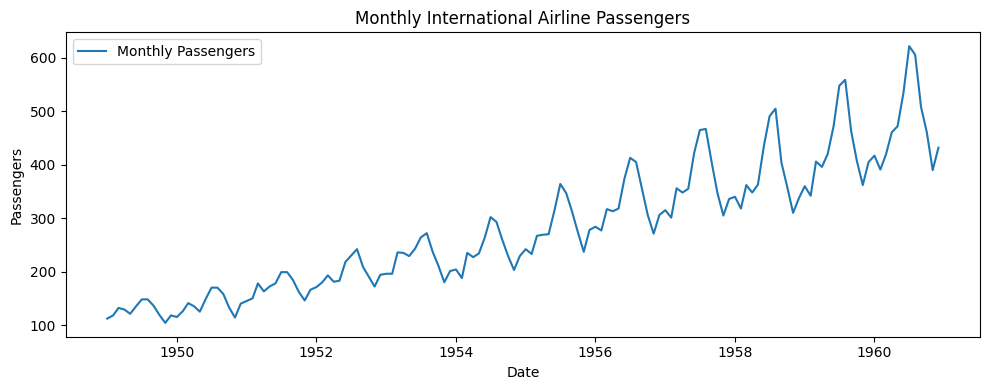

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

plt.figure(figsize=(10, 4))
plt.plot(df['Passengers'], label='Monthly Passengers')
plt.title('Monthly International Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Passengers']])

In [5]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_len = 10
X, y = create_sequences(scaled_data, seq_len)

In [6]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [7]:
model = Sequential([
    SimpleRNN(64, activation='tanh', input_shape=(seq_len, 1)),
    Dense(1)
])

I0000 00:00:1748992236.969299    4499 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9
/home/stephen/miniconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [10]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stop, lr_schedule],
    verbose=1
)

Epoch 1/100


I0000 00:00:1748992265.505514    4642 service.cc:152] XLA service 0x7fbb3c0d76d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748992265.505569    4642 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-06-04 04:41:05.542795: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748992265.770140    4642 cuda_dnn.cc:529] Loaded cuDNN version 90300


6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0494 - mae: 0.1630 - mape: 923455.8750

I0000 00:00:1748992265.122619    4642 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - loss: 0.0448 - mae: 0.1560 - mape: 1028472.4375 - val_loss: 0.0259 - val_mae: 0.1135 - val_mape: 15.9415 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0111 - mae: 0.0788 - mape: 85539.7500 - val_loss: 0.0580 - val_mae: 0.1959 - val_mape: 27.3016 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0071 - mae: 0.0602 - mape: 467588.8750 - val_loss: 0.0167 - val_mae: 0.1017 - val_mape: 15.7924 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0072 - mae: 0.0698 - mape: 593224.3750 - val_loss: 0.0214 - val_mae: 0.1040 - val_mape: 14.1772 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0058 - mae: 0.0576 - mape: 106977.0078 - val_loss: 0.0256 - val_mae: 0.1192 - val_mape: 16.2570 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0052 - mae: 0.0527 - mape: 499357.4375 - val_loss: 

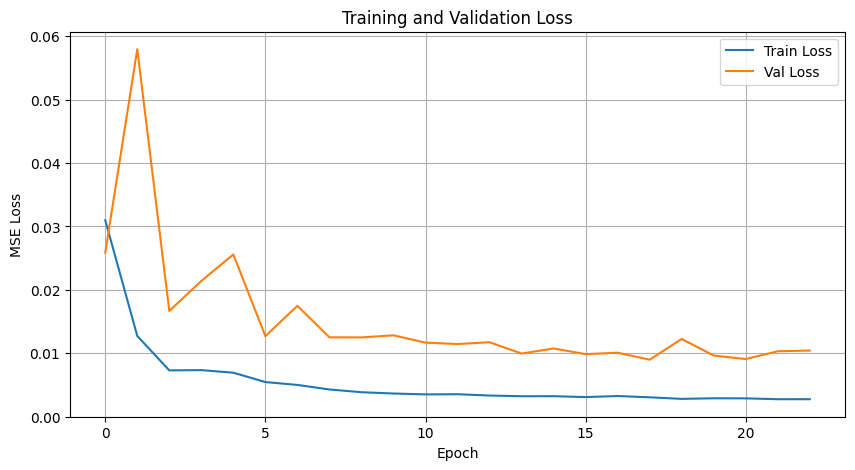

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


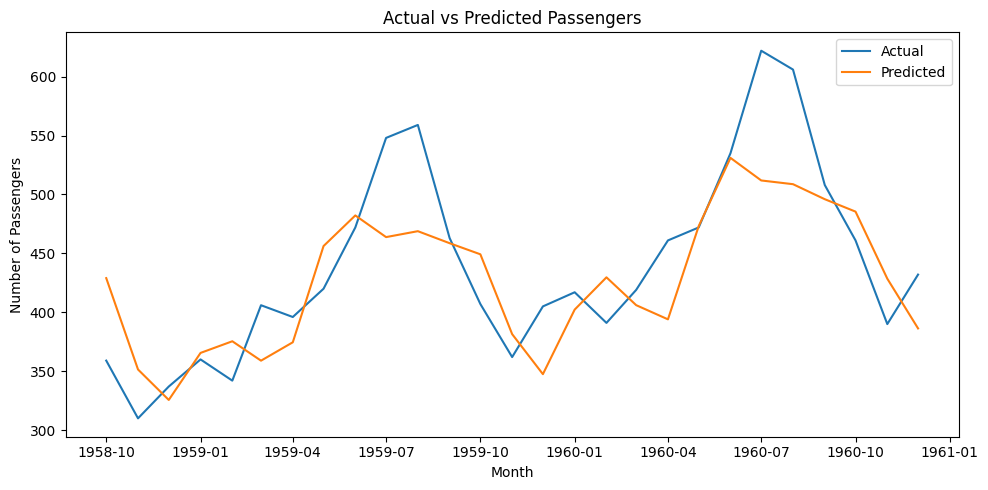

In [12]:
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

plt.figure(figsize=(10, 5))
plt.plot(df.index[-len(y_test_inv):], y_test_inv, label='Actual')
plt.plot(df.index[-len(y_pred_inv):], y_pred_inv, label='Predicted')
plt.title('Actual vs Predicted Passengers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.tight_layout()
plt.show()